# Modeling Inductance in an RLC Circuit

In [16]:
import numpy as np
import scipy.optimize as opt
from scipy import interpolate
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import pandas as pd
from sympy import symbols, sin, cos, diff, integrate, solvers
from matplotlib.animation import FuncAnimation, PillowWriter

In [2]:
# Import Circuit Data as x
x = pd.read_csv("reference.csv")
x

,Time (microseconds),Voltage (mV)
0,-129.6,0.00
1,148.0,184.00
2,476.0,-132.00
3,796.0,100.00
4,1124.0,-72.00
5,1444.0,60.00
6,1764.0,-40.00
7,2092.0,36.00
8,2428.0,-16.00
9,2748.0,16.00


In [3]:
# Make sure Data imported correectly
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time (microseconds)  18 non-null     float64
 1   Voltage (mV)         18 non-null     float64
dtypes: float64(2)
memory usage: 420.0 bytes


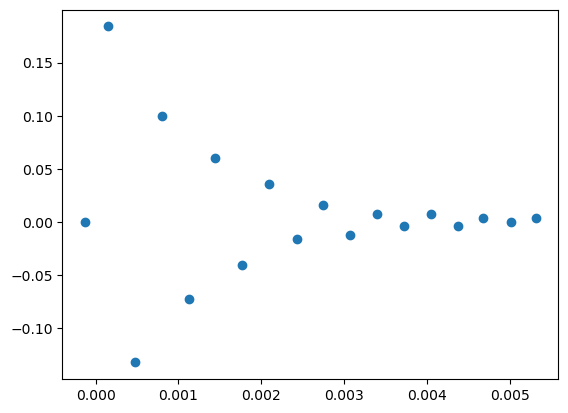

In [4]:
# Assign time and voltage to x and y coordinates respectively, and plot simply to check for errors
xdata = x['Time (microseconds)']/1e6
ydata = x['Voltage (mV)']/1e3

plt.scatter(xdata, ydata)

plt.show()

In [5]:
# Import data for underdamped circuit
y = pd.read_csv("discharging.csv")
y

,Time (seconds),delta(V)
0,-1.780,0.40
1,-1.769,8.44
2,-1.765,7.96
3,-1.761,7.48
4,-1.753,6.52
5,-1.745,5.88
6,-1.732,5.24
7,-1.725,4.36
8,-1.713,3.64
9,-1.697,3.00


    Time (seconds)  delta(V)
1           -1.769      8.44
2           -1.765      7.96
3           -1.761      7.48
4           -1.753      6.52
5           -1.745      5.88
6           -1.732      5.24
7           -1.725      4.36
8           -1.713      3.64
9           -1.697      3.00
10          -1.681      2.36
11          -1.661      1.88
12          -1.605      1.00
13          -1.557      0.52
14          -1.501      0.28
15          -1.421      0.12
16          -1.277      0.04


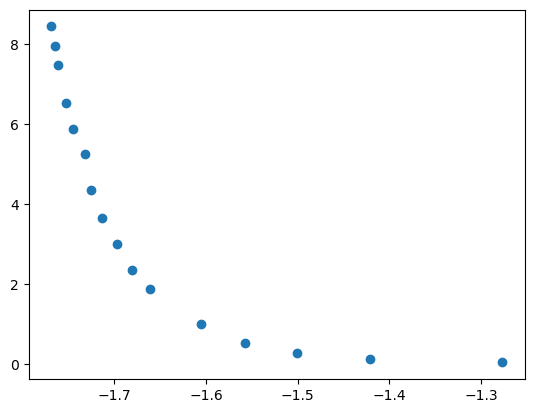

In [6]:
# Keep only necessary Data
y = y.drop(0)

# Print to see if the data is correct
print(y)
xd = y['Time (seconds)']
yd = y['delta(V)']

# Plot to make sure everything works well
plt.scatter(xd, yd)
plt.show()

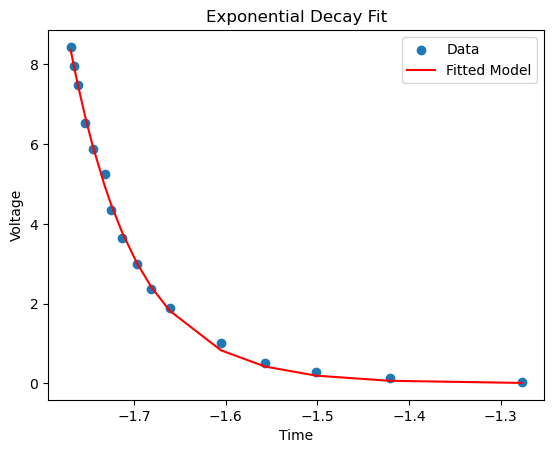

In [7]:
def exp_decay(x, A, x0, r):
    return A*np.exp(r*(x+x0))
"""
    Exponential decay model.

    Parameters:
        x : array-like
            Independent variable (e.g., time).
        A : float
            Initial amplitude or scaling factor.
        x0 : float
            Horizontal shift (offset along x-axis).
        r : float
            Decay (or growth) rate.

    Returns:
        array-like
            Model-predicted values for exponential decay.
"""

# Fit the exponential model to data (xd, yd)
popt, pcov = opt.curve_fit(exp_decay, xd, yd)

# Extract fitted parametera
A_fit, x0_fit, r_fit = popt

# print(popt)

# plot data with fitted model
plt.scatter(xd, yd, label="Data")
plt.plot(xd, exp_decay(xd, *popt), label="Fitted Model", color='r')
plt.title("Exponential Decay Fit")
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.legend()
plt.show()

In [8]:
# Import the charging phase of the circuit
z = pd.read_csv("charging.csv")
z

,Time (seconds),delta(V)
0,-1.788,0.16
1,-1.773,-6.24
2,-1.753,-5.76
3,-1.745,-5.12
4,-1.733,-4.24
5,-1.721,-3.52
6,-1.705,-2.80
7,-1.693,-2.32
8,-1.677,-1.92
9,-1.657,-1.36


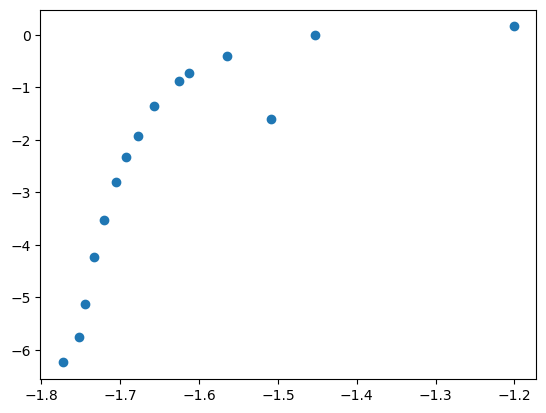

In [9]:
# Keep only necessary Data
z = z.drop(0)
xdat = z['Time (seconds)']
ydat = z['delta(V)']

# Plot to make sure everything works well
plt.scatter(xdat, ydat)
plt.show()

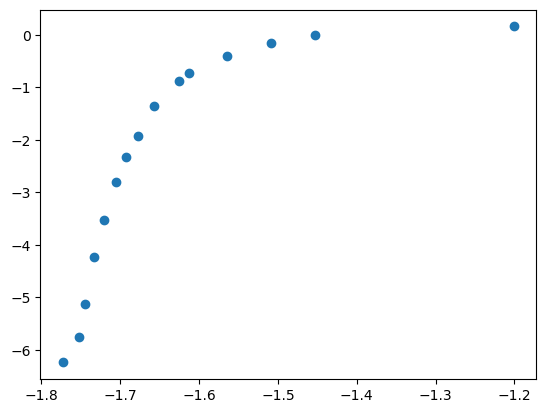

In [10]:
# Correct data point that was read incorrectly
z['delta(V)'].loc[13] = -0.16

# Replot correct data
plt.scatter(xdat, ydat)
plt.show()

[  0.84145768   1.61028337 -12.85679108]


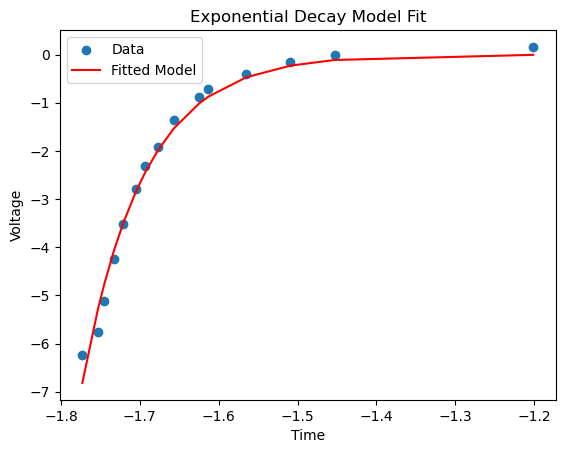

In [11]:
def exp_decay_1(x, A, x0, r):
    a = x + x0
    return -A*np.exp(r*a)
"""
    Modified exponential decay model.
    
    Parameters:
        x : array-like
            Input data (e.g., time).
        A : float
            Amplitude scaling factor.
        x0 : float
            Horizontal shift (offset).
        r : float
            Exponential rate (decay or growth).
    
    Returns:
        array-like
            Negative exponential model output.
"""

# Fit modified decay model to data
popt1, pcov1 = opt.curve_fit(exp_decay_1, xdat, ydat)

# Extract fitted parameters
A_f, x0_f, r_f = popt1

print(popt1)

# Plot data and fitted model
plt.scatter(xdat, ydat, label="Data")
plt.plot(xdat, exp_decay(xdat, -A_f, x0_f, r_f), label="Fitted Model", color='r')
plt.title("Exponential Decay Model Fit")
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.legend()
plt.show()

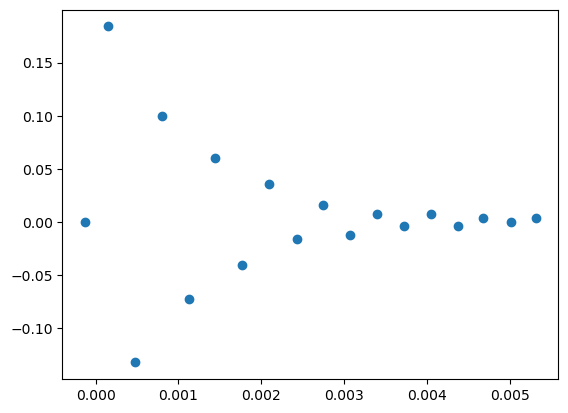

In [12]:
# Plot the Data to recreate the visual of the oscilloscope when the ciruit was running
plt.scatter(xdata,ydata)
plt.show()

[4.34409002e+02 2.00556054e-01 5.35603513e-08 4.43622481e-01
 1.51253926e-01]


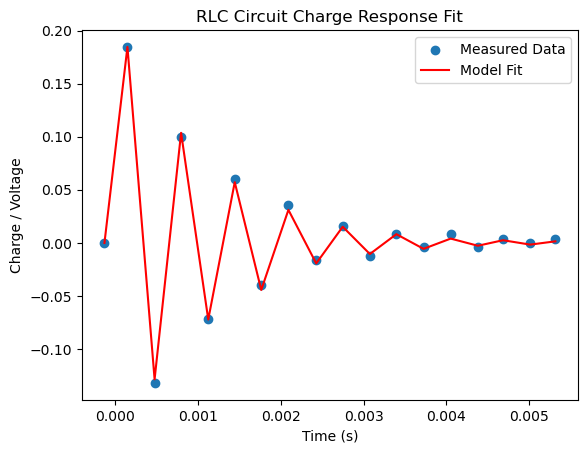

In [13]:
# Define the RLC circuit parameters
R = 50  # Resistance in Ohms
L = 0.1  # Inductance in Henrys
C = 1e-7 # Capacitance in Farads

def charge_equation(t, R, L, C, c_1, c_2):
    real_component = -R/(2*L)
    imaginary_component = np.sqrt(-(R**2-4*L/C))/(2*L)
    return np.exp(real_component * t)*(c_1 * np.cos(imaginary_component*t) + c_2 * np.sin(imaginary_component * t))
"""
    Analytical charge solution for underdamped RLC circuit.

    Parameters:
        t   : array-like
              Time (seconds).
        R   : float
              Resistance (Ohms).
        L   : float
              Inductance (Henrys).
        C   : float
              Capacitance (Farads).
        c_1, c_2 : float
              Constants determined from initial conditions.

    Returns:
        array-like
              Charge or voltage response at time t.
"""

# Fit the model to experimental data
# p0 gives initial guesses; bounds ensure valid positive parameters
popt, pcov = opt.curve_fit(charge_equation, xdata, ydata, p0=(50, 0.1, 1e-7, 1, 1), bounds=(0, np.inf))

print(popt) 

# Plot original data and fitted model
plt.scatter(xdata, ydata, label="Measured Data")
plt.plot(xdata, charge_equation(xdata, *popt), label="Model Fit", color='r')
plt.title("RLC Circuit Charge Response Fit")
plt.xlabel("Time (s)")
plt.ylabel("Charge / Voltage")
plt.legend()
plt.show()

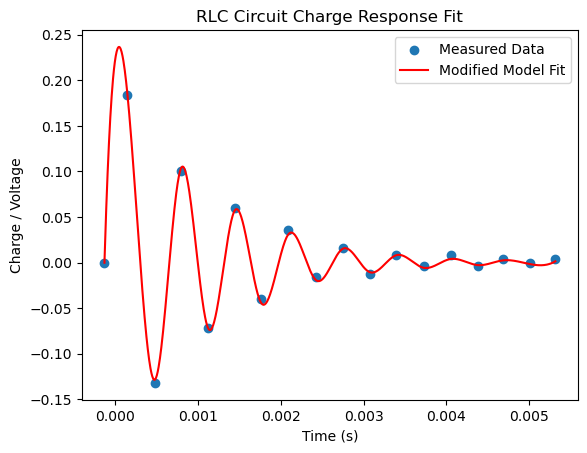

In [31]:
# Interpolating the data to make the curve fit more natural and like a dampened sinusoidal
f_interp = interpolate.interp1d(xdata, charge_equation(xdata, *popt), kind=3) 
# Upon some experimentation, a cubic interpolation generates the most accurate result
x_new = np.linspace(min(xdata),max(xdata),1000) # Define a linespace with smaller intervals for a more defined graph
y_new = f_interp(x_new) # interpolate the same data points on the new linespace

# Plot the data and the interpolated graph
plt.scatter(xdata, ydata, label="Measured Data")
plt.plot(x_new, y_new, label='Modified Model Fit', color='r')
plt.title("RLC Circuit Charge Response Fit")
plt.xlabel("Time (s)")
plt.ylabel("Charge / Voltage")
plt.legend()
plt.show()

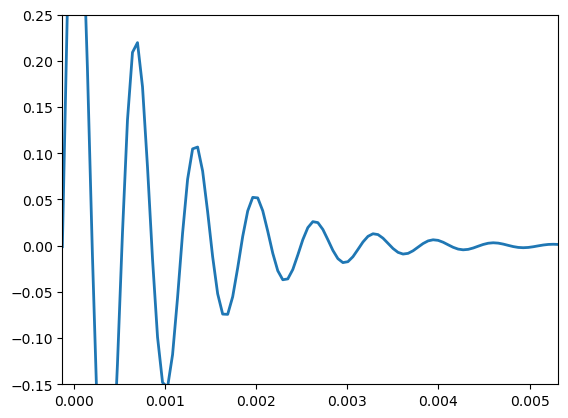

In [27]:
# Create a plot for animating the oscillation of voltage in the RLC circuit system over time
fig, ax = plt.subplots()
ax.set(xlim=[min(x_new), max(x_new)], ylim=[-0.15, 0.25])
line, = ax.plot(x_new, y_new, lw=2) 
# Update frames using the charge equation function with simplified optimal parameters for convenience
def update(frame): 
    line.set_ydata(np.exp(-1086 * x_new)*(.4436 * np.cos(9601* (x_new+frame/10)) + .1512 * np.sin(9601* (x_new+frame/10))))
    return line, 
# Generate the animation
anim = FuncAnimation(fig, update, frames = 100, interval = 50, blit = True)

In [28]:
# Exporting the animation
writer = PillowWriter(fps = 10)
anim.save("animation.gif", writer=writer)

Fitted Parameters (R, L, C, c1, c2):  [4.34409002e+02 2.00556054e-01 5.35603513e-08 4.43622481e-01
 1.51253926e-01]
Parameter Uncertainties:  [8.78507738e+01 5.09719257e-03 7.71532455e-10 1.96635396e-02
 3.75116983e-03]
RMSE: 0.0026317131506088036
Reduced Chi-Squared: 1.6242387692682567


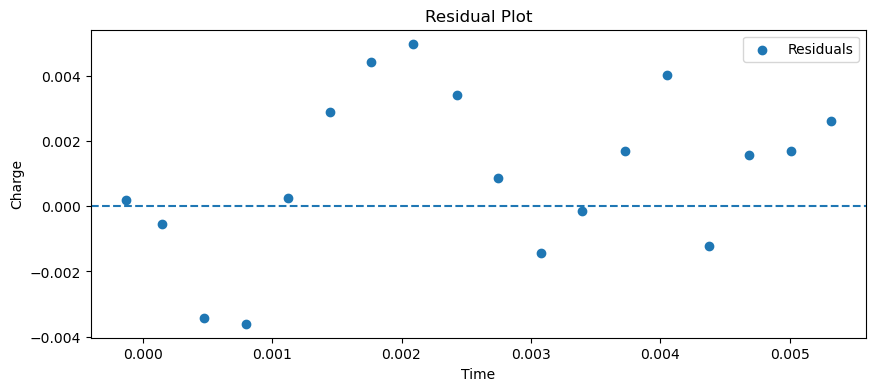

In [15]:
# Extract parameter uncertainties (standard deviations)
perr = np.sqrt(np.diag(pcov))

print("Fitted Parameters (R, L, C, c1, c2): ", popt)
print("Parameter Uncertainties: ", perr)

# Computing Residuals
y_fit = charge_equation(xdata, *popt)
residuals = ydata - y_fit

# Computing Root Mean Square Error (RMSE)
rmse = np.sqrt(np.mean(residuals**2))
print("RMSE:", rmse)

# Comptuing Reduced Chi-Squared (χ²)
# If we assume measurement uncertainty (σ) is constant
sigma = np.std(residuals)
chi_squared = np.sum((residuals / sigma)**2)
reduced_chi_squared = chi_squared / (len(xdata) - len(popt))

print("Reduced Chi-Squared:", reduced_chi_squared)

# Plotting Residuals
plt.figure(figsize=(10,4))
plt.scatter(xdata, residuals, label="Residuals")
plt.axhline(0, linestyle="--")
plt.xlabel("Time")
plt.ylabel("Charge")
plt.title("Residual Plot")
plt.legend()
plt.show()